In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras import backend as K
from keras.layers.core import Dense
from keras.metrics import categorical_crossentropy
%matplotlib inline

c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


###  Reading the file

In [2]:
filename = "C:\\Users\\vinayak tyagi\\Desktop\\feedback.csv"
df = pd.read_csv(filename)

df.head(12)

,meet expectation,prestation,well prepared trainer,query resolution,customer valuation,persue carrier,project,recommond
0,5,5,5,4,5,1,1,1
1,3,5,4,4,5,1,1,1
2,4,4,4,5,4,1,1,1
3,4,5,5,5,4,1,1,1
4,4,4,4,4,4,1,1,1
5,4,5,4,4,5,0,0,1
6,4,5,5,5,5,0,1,1
7,4,5,5,5,5,1,1,1
8,4,5,5,5,5,1,1,1
9,2,4,2,4,4,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
meet expectation         12 non-null int64
prestation               12 non-null int64
well prepared trainer    12 non-null int64
query resolution         12 non-null int64
customer valuation       12 non-null int64
persue carrier           12 non-null int64
project                  12 non-null int64
recommond                12 non-null int64
dtypes: int64(8)
memory usage: 848.0 bytes


In [4]:
test = df["meet expectation"]
test.unique()

array([5, 3, 4, 2], dtype=int64)

In [5]:
df.drop("recommond",axis=1,inplace=True)
df.describe()

,meet expectation,prestation,well prepared trainer,query resolution,customer valuation,persue carrier,project
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3.750000,4.750000,4.333333,4.416667,4.666667,0.833333,0.916667
std,0.753778,0.452267,0.887625,0.514929,0.492366,0.389249,0.288675
min,2.000000,4.000000,2.000000,4.000000,4.000000,0.000000,0.000000
25%,3.750000,4.750000,4.000000,4.000000,4.000000,1.000000,1.000000
50%,4.000000,5.000000,4.500000,4.000000,5.000000,1.000000,1.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000


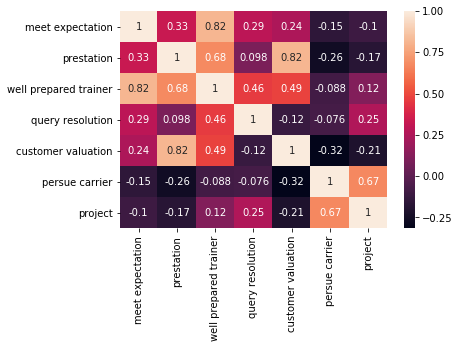

In [6]:
# plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

## Strong  Correlation Features are
meet expactation - well pred trainer ,
prestation - well pred trainer ,
prestation - custmor valuation ,
purse carrier - project ,
custoemer- query resolution ,
persue carrier - customer valuation

In [7]:
traindf, testdf = train_test_split(df, test_size = 0.3)
# print(traindf); print(testdf)

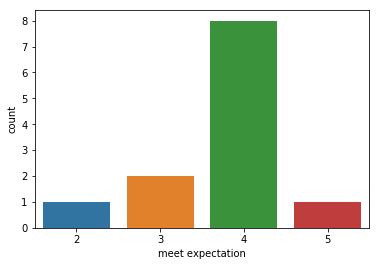

In [8]:
# print(df.corr())
sns.countplot(test)

Text(0.5,1,'Meet Expectation \n original value ratio')

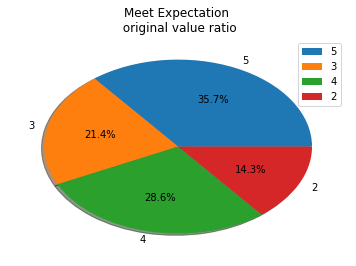

In [9]:
# Pie chart to explain
plt.pie(test.unique(),labels=test.unique(), shadow = True, autopct='%1.1f%%')
plt.legend()
plt.title("Meet Expectation \n original value ratio")

In [10]:
def classification_model(model, data, predictors, target):
  
  model.fit(data[predictors],data[target])

  predictions = model.predict(data[predictors])
  print(predictions)
  print(data[predictors])  
  x = predictions
  
  accuracy = metrics.accuracy_score(predictions,data[target])
  print(accuracy)
  print("Accuracy :",np.round(accuracy,3)*100,'%')
    
  return x 

[4 4 4 4 3 3 4 4]
    prestation  well prepared trainer  customer valuation  query resolution  \
8            5                      5                   5                 5   
0            5                      5                   5                 4   
7            5                      5                   5                 5   
3            5                      5                   4                 5   
1            5                      4                   5                 4   
10           5                      4                   5                 4   
2            4                      4                   4                 5   
6            5                      5                   5                 5   

    persue carrier  project  
8                1        1  
0                1        1  
7                1        1  
3                1        1  
1                1        1  
10               1        1  
2                1        1  
6                0        1  


Text(0,0.5,"feature's")

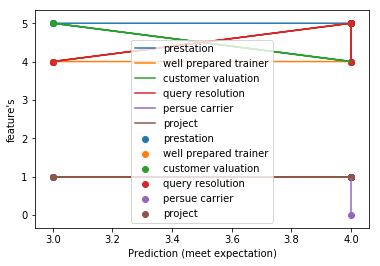

In [11]:
# Logistic regration

predictor_var = ['prestation','well prepared trainer','customer valuation','query resolution','persue carrier','project']
target_var='meet expectation'
model=LogisticRegression()
pred = classification_model(model,traindf,predictor_var,target_var)


plt.plot(pred,traindf["prestation"])
plt.plot(pred,traindf["well prepared trainer"])
plt.plot(pred,traindf["customer valuation"])
plt.plot(pred,traindf["query resolution"])
plt.plot(pred,traindf["persue carrier"])
plt.plot(pred,traindf["project"])

plt.scatter(pred,traindf["prestation"])
plt.scatter(pred,traindf["well prepared trainer"])
plt.scatter(pred,traindf["customer valuation"])
plt.scatter(pred,traindf["query resolution"])
plt.scatter(pred,traindf["persue carrier"])
plt.scatter(pred,traindf["project"])

plt.legend()
plt.xlabel("Prediction (meet expectation)")
plt.ylabel("feature's")

No handles with labels found to put in legend.


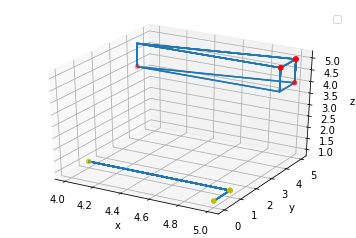

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
rs = np.array(traindf["customer valuation"])
rm = np.array(traindf["project"])
z = rs.reshape(-1,1)
z1 = rm.reshape(-1,1)

ax1.plot_wireframe(traindf["prestation"],traindf["well prepared trainer"],z)
ax1.plot_wireframe(traindf["query resolution"],traindf["persue carrier"],z1)


ax1.scatter(traindf["prestation"],traindf["well prepared trainer"],traindf["customer valuation"],c='r')
ax1.scatter(traindf["query resolution"],traindf["persue carrier"],traindf["project"],c='y')


ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.legend()

In [13]:
def graph(y,label):
    plt.plot(pred,y)
    plt.scatter(pred,y)
    plt.legend()
    plt.xlabel("Prediction (meet expecatation)")
    plt.ylabel(label)
    plt.show()

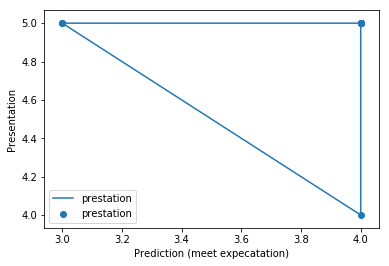

In [14]:
graph(traindf["prestation"],"Presentation")

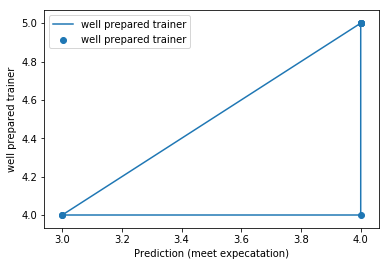

In [15]:
graph(traindf["well prepared trainer"],"well prepared trainer")

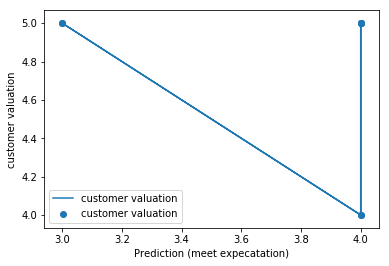

In [16]:
graph(traindf["customer valuation"],"customer valuation")

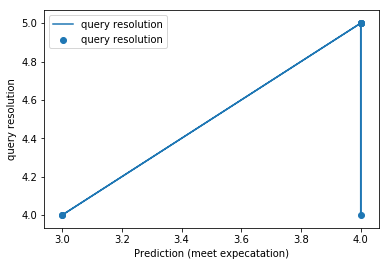

In [17]:
graph(traindf["query resolution"],"query resolution")

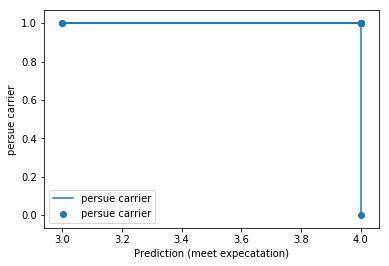

In [18]:
graph(traindf["persue carrier"],"persue carrier")

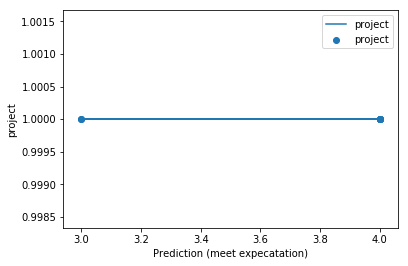

In [19]:
graph(traindf["project"],"project")

[4 4 4 4 3 3 4 4]


Text(0.5,1,"Meet Expectation Prediction's by Logisitic Regression")

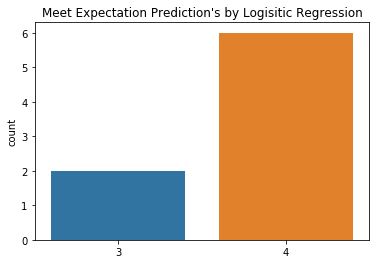

In [20]:
print(pred)
sns.countplot(pred)
plt.title("Meet Expectation Prediction's by Logisitic Regression")

[4 4 4 4 3 3 4 4]


Text(0.5,1,"Meet Expectation Prediction's by Logisitic Regression")

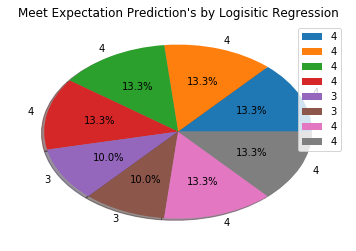

In [21]:
print(pred)
plt.pie(pred, labels=pred, shadow=True, autopct='%1.1f%%')
plt.legend()
plt.title("Meet Expectation Prediction's by Logisitic Regression")

[4 4 4 4 3 3 4 4]
    prestation  well prepared trainer  customer valuation  query resolution  \
8            5                      5                   5                 5   
0            5                      5                   5                 4   
7            5                      5                   5                 5   
3            5                      5                   4                 5   
1            5                      4                   5                 4   
10           5                      4                   5                 4   
2            4                      4                   4                 5   
6            5                      5                   5                 5   

    persue carrier  project  
8                1        1  
0                1        1  
7                1        1  
3                1        1  
1                1        1  
10               1        1  
2                1        1  
6                0        1  


Text(0,0.5,"feature's")

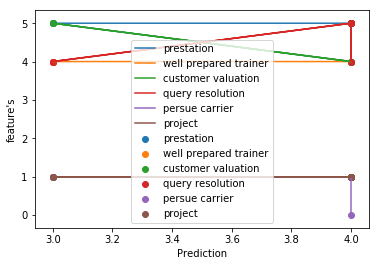

In [22]:
# SVM

predictor_var = ['prestation','well prepared trainer','customer valuation','query resolution','persue carrier','project']
target_var='meet expectation'
model= svm.SVC(kernel='rbf',gamma=0.7, C=1)
pred = classification_model(model,traindf,predictor_var,target_var)

plt.plot(pred,traindf["prestation"])
plt.plot(pred,traindf["well prepared trainer"])
plt.plot(pred,traindf["customer valuation"])
plt.plot(pred,traindf["query resolution"])
plt.plot(pred,traindf["persue carrier"])
plt.plot(pred,traindf["project"])

plt.scatter(pred,traindf["prestation"])
plt.scatter(pred,traindf["well prepared trainer"])
plt.scatter(pred,traindf["customer valuation"])
plt.scatter(pred,traindf["query resolution"])
plt.scatter(pred,traindf["persue carrier"])
plt.scatter(pred,traindf["project"])

plt.legend()
plt.xlabel("Prediction")
plt.ylabel("feature's")

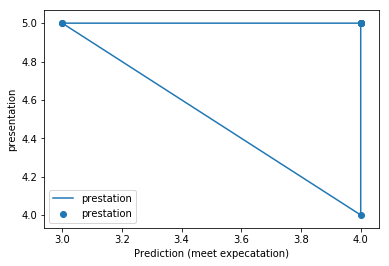

In [23]:
# Visulization of data

graph(traindf["prestation"],"presentation")

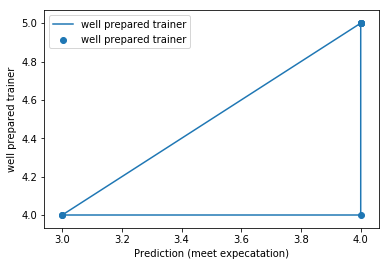

In [24]:
graph(traindf["well prepared trainer"],"well prepared trainer")

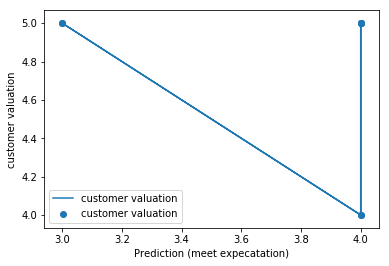

In [25]:
graph(traindf["customer valuation"],"customer valuation")

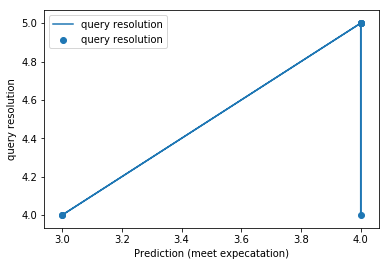

In [26]:
graph(traindf["query resolution"],"query resolution")

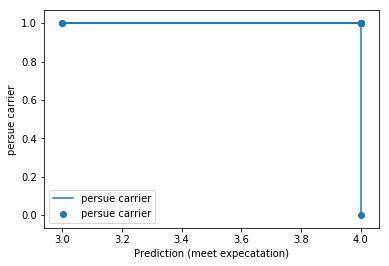

In [27]:
graph(traindf["persue carrier"],"persue carrier")

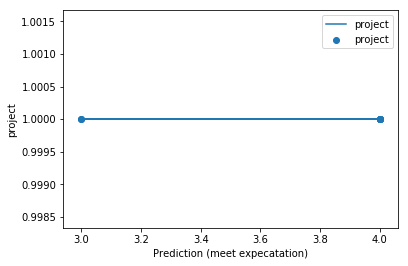

In [28]:
graph(traindf["project"],"project")

[4 4 4 4 3 3 4 4]


Text(0.5,1,"Meet Expectation Prediction's by SVM")

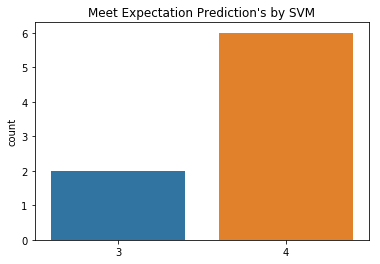

In [29]:
print(pred)
sns.countplot(pred)
plt.title("Meet Expectation Prediction's by SVM")

[4 4 4 4 3 3 4 4]


Text(0.5,1,'Prediction of meet Expectation by SVM')

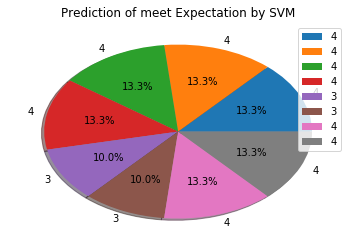

In [30]:
# Pie chart by SVM predicition
print(pred)
plt.pie(pred,labels=pred,shadow=True,autopct="%1.1f%%")
plt.legend()
plt.title("Prediction of meet Expectation by SVM")

In [31]:
# Nural Network "Sequential model"
predictor_var = ['prestation','well prepared trainer','customer valuation','query resolution','persue carrier','project']
target_var='meet expectation'

# print(traindf[predictor_var]);print(traindf[target_var])

train_labels = np.array(traindf[predictor_var])
train_sample = np.array(traindf[target_var])

print("train_labels-->\n",train_labels); print("train_sample-->\n",train_sample)

# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_train_sample = scaler.fit_transform((train_sample).reshape(-1,1))

train_sample = (train_sample).reshape(-1,1)
print(train_sample)

model = Sequential([
    Dense(97,input_shape=(6,), activation='relu'),
    Dense(52, activation='relu'),
    Dense(52, activation='relu'),
    Dense(52, activation='relu'),
    Dense(52, activation='relu'),
    Dense(6, activation = 'softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_labels, train_sample, epochs=150,validation_split=0.1, shuffle=True, verbose=2)

train_labels-->
 [[5 5 5 5 1 1]
 [5 5 5 4 1 1]
 [5 5 5 5 1 1]
 [5 5 4 5 1 1]
 [5 4 5 4 1 1]
 [5 4 5 4 1 1]
 [4 4 4 5 1 1]
 [5 5 5 5 0 1]]
train_sample-->
 [4 5 4 4 3 3 4 4]
[[4]
 [5]
 [4]
 [4]
 [3]
 [3]
 [4]
 [4]]
Train on 7 samples, validate on 1 samples
Epoch 1/150
 - 0s - loss: 1.4135 - acc: 0.4286 - val_loss: 1.0243 - val_acc: 1.0000
Epoch 2/150
 - 0s - loss: 1.2527 - acc: 0.5714 - val_loss: 0.7552 - val_acc: 1.0000
Epoch 3/150
 - 0s - loss: 1.1432 - acc: 0.5714 - val_loss: 0.5402 - val_acc: 1.0000
Epoch 4/150
 - 0s - loss: 1.0826 - acc: 0.5714 - val_loss: 0.3985 - val_acc: 1.0000
Epoch 5/150
 - 0s - loss: 1.0558 - acc: 0.5714 - val_loss: 0.3282 - val_acc: 1.0000
Epoch 6/150
 - 0s - loss: 1.0460 - acc: 0.5714 - val_loss: 0.3082 - val_acc: 1.0000
Epoch 7/150
 - 0s - loss: 1.0309 - acc: 0.5714 - val_loss: 0.3271 - val_acc: 1.0000
Epoch 8/150
 - 0s - loss: 1.0116 - acc: 0.5714 - val_loss: 0.3631 - val_acc: 1.0000
Epoch 9/150
 - 0s - loss: 0.9860 - acc: 0.5714 - val_loss: 0.4076 - val_

Epoch 95/150
 - 0s - loss: 0.0185 - acc: 1.0000 - val_loss: 0.0227 - val_acc: 1.0000
Epoch 96/150
 - 0s - loss: 0.0174 - acc: 1.0000 - val_loss: 0.0224 - val_acc: 1.0000
Epoch 97/150
 - 0s - loss: 0.0165 - acc: 1.0000 - val_loss: 0.0206 - val_acc: 1.0000
Epoch 98/150
 - 0s - loss: 0.0156 - acc: 1.0000 - val_loss: 0.0179 - val_acc: 1.0000
Epoch 99/150
 - 0s - loss: 0.0147 - acc: 1.0000 - val_loss: 0.0162 - val_acc: 1.0000
Epoch 100/150
 - 0s - loss: 0.0140 - acc: 1.0000 - val_loss: 0.0166 - val_acc: 1.0000
Epoch 101/150
 - 0s - loss: 0.0133 - acc: 1.0000 - val_loss: 0.0175 - val_acc: 1.0000
Epoch 102/150
 - 0s - loss: 0.0126 - acc: 1.0000 - val_loss: 0.0172 - val_acc: 1.0000
Epoch 103/150
 - 0s - loss: 0.0120 - acc: 1.0000 - val_loss: 0.0154 - val_acc: 1.0000
Epoch 104/150
 - 0s - loss: 0.0114 - acc: 1.0000 - val_loss: 0.0139 - val_acc: 1.0000
Epoch 105/150
 - 0s - loss: 0.0109 - acc: 1.0000 - val_loss: 0.0140 - val_acc: 1.0000
Epoch 106/150
 - 0s - loss: 0.0104 - acc: 1.0000 - val_loss

In [32]:
#evaluate the model
score = model.evaluate(train_labels,train_sample)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100 ))

8/8 [==============================] - 0s 374us/step

acc: 100.00%


In [33]:
predict = model.predict_classes(train_labels)
print(predict)

[4 5 4 4 3 3 4 4]
